# Linear Regression Model
Build Linear Regression Model without API (ex. sklearn)  

In [55]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import numpy as np

# load diabetes dataset via sklearn
# Return type : Bunch
# data {ndarray, dataframe} (442, 10)   -> df_X
# target {ndarray, Series} (442,)   -> df_y 
diabetes = load_diabetes(as_frame=True)
df_X = diabetes.data
df_y = diabetes.target

# Check the type and size of df_X & df_y
print("df_X shape: ", df_X.shape," df_X type: ",type(df_X))
print("df_y shape: ", df_y.shape," df_y type: ",type(df_y))

# Change dataset type from dataframe to array
X = df_X.values
y = df_y.values

# Check the type and size of X & y
print("X shape: ", X.shape," df_X type: ",type(X))
print("y shape: ", y.shape," df_y type: ",type(y))

# Split dataset to train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

df_X shape:  (442, 10)  df_X type:  <class 'pandas.core.frame.DataFrame'>
df_y shape:  (442,)  df_y type:  <class 'pandas.core.series.Series'>
X shape:  (442, 10)  df_X type:  <class 'numpy.ndarray'>
y shape:  (442,)  df_y type:  <class 'numpy.ndarray'>


In [56]:
# prepare W, b vector
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

# model function
# sklearn
# model = LinearRegression()
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i]* W[i]
    predictions += b
    return predictions

# loss function - MSE
def MSE(a, b):
    return ((a - b) ** 2).mean()

def loss(X, W, b, y):
    predictions = model(X, W, b)
    return MSE(y, predictions)

# gradient
def gradient(X, W, b, y):
    N = len(y)
    y_pred = model(X, W, b)
    dW = 2/N * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    return dW, db

In [57]:
LEARNING_RATE = 0.1
losses = []

# training
# model.fit( , )
for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3451.0744
Iteration 2000 : Loss 3053.0893
Iteration 3000 : Loss 2912.2388
Iteration 4000 : Loss 2852.3487
Iteration 5000 : Loss 2824.1624
Iteration 6000 : Loss 2809.6306
Iteration 7000 : Loss 2801.5015
Iteration 8000 : Loss 2796.6200
Iteration 9000 : Loss 2793.5018
Iteration 10000 : Loss 2791.3945


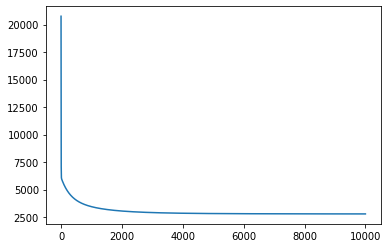

In [58]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

In [59]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3142.300171673319

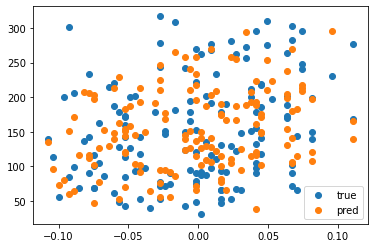

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], prediction, label='pred')
plt.legend()
plt.show()